In [104]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns

In [105]:
data = pd.read_csv('QueryResults.csv')

In [106]:
data

,Body,Title,Tags
0,<blockquote>\n <p><strong>Possible Duplicate:...,extract a rar file by c code,<c><winrar><unrar>
1,<p>I need to convert SVG XML to a PNG using PH...,PHP converting an SVG to PNG WITHOUT ImageMagick,<php><windows><svg><imagemagick><png>
2,<p>I got a question concerning the <code>+=</c...,The += operator,<java><javascript><operators>
3,<p>My cofounder and I are setting up our serve...,Best solutions to deploy from git to production?,<git><deployment>
4,<p>For Windows OS</p>\n\n<pre><code>d:\test1\t...,How to delete subfolders and Files but not par...,<windows><powershell><command-line-interface>
...,...,...,...
49995,"<p>Folks,</p>\n\n<p>I have got to work with a ...",How to train a team member to be the Xml Expert,<xml><xslt><xpath>
49996,<p>I need to have an application simply record...,Please Recommend a Simple Automated GUI record...,<user-interface><automation>
49997,<p>What is the best/most common way to create ...,Creating Website - Full Control,<html><css><web>
49998,"<p>As it shows on my code, I'm trying to make ...",Why does my code not work when I'm adding my p...,<java><swing><jframe><containers><japplet>


In [117]:
from nltk.tokenize import word_tokenize
down = data['Body'].str.lower()
reviews = down.str.cat(sep=' ')
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
# sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')).union({'?','(',')', ':', ',',"''",'``','-', "'",'<','>','!','$','@'})
tokens = [w for w in tokens if not w in stop_words]

frequency_dist = nltk.FreqDist(tokens)
# sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

KeyboardInterrupt: 

In [110]:
sorted = pd.Series(frequency_dist).sort_values(ascending=False)

In [114]:
df = pd.DataFrame(data = {'word':np.array(sorted.index), 'quant':np.array(sorted.values)})

In [115]:
df[0:10]

,word,quant
0,using,3531
1,python,3279
2,function,2531
3,error,2442
4,array,2220
5,string,2214
6,file,2079
7,javascript,1993
8,value,1985
9,get,1911


<AxesSubplot:xlabel='word', ylabel='quant'>

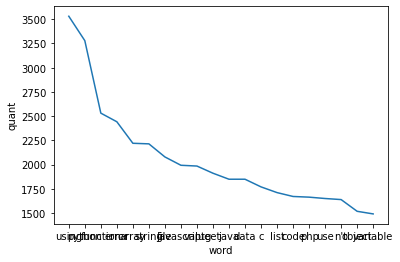

In [116]:
sns.lineplot(data = df[0:20], x = 'word', y='quant' )

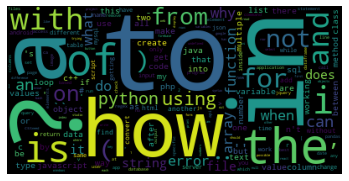

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()